In [1]:
# import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras import models

from sklearn.metrics import confusion_matrix

In [2]:
# color channel
K.set_image_data_format('channels_last')

# set random seed
np.random.seed(0)

# set image info
channels = 1
height = 28
width = 28

In [3]:
# load MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# reshape training and test data
data_train = data_train.reshape(data_train.shape[0], height, width, channels)
data_test = data_test.reshape(data_test.shape[0], height, width, channels)

# view shape of training and test data
print('data_train: ', data_train.shape)
print('data_test: ', data_test.shape)

data_train:  (60000, 28, 28, 1)
data_test:  (10000, 28, 28, 1)


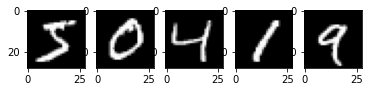

In [4]:
# subplots for first 5 figures of training data
fig, axes = plt.subplots(nrows = 1, ncols = 5)

for idx, ax in enumerate(axes):
    image = data_train[idx]
    ax.imshow(image, cmap = 'gray')
plt.show()

In [5]:
# ensure training array labels match images
target_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
# rescale pixel intensity
features_train = data_train/255
features_test = data_test/255

In [7]:
# one hot encoding
target_train = to_categorical(target_train)
target_test = to_categorical(target_test)

number_of_classes = target_test.shape[1]

In [8]:
# view shapes
print('target_train: ', target_train.shape)
print('target_test: ', target_test.shape)

target_train:  (60000, 10)
target_test:  (10000, 10)


In [9]:
# build cnn (20.15)
cnn = Sequential()

# convolutional layer
cnn.add(Conv2D(filters = 64, 
               kernel_size = (5, 5), 
               input_shape = (height, width, channels),
               activation = 'relu'))

# max pooling layer
cnn.add(MaxPooling2D(pool_size = (2,2)))

# dropout layer
cnn.add(Dropout(0.5))

# flatten input
cnn.add(Flatten())

# connected layer with relu activation
cnn.add(Dense(128, activation = 'relu'))

# connected layer with softmax activation
cnn.add(Dense(number_of_classes, activation = 'softmax'))

In [10]:
# compile network with cross entropy, root mean square, and accuracy metrics
cnn.compile(loss = 'categorical_crossentropy', 
            optimizer = 'rmsprop', 
            metrics = ['accuracy'])

In [11]:
print(features_train.shape)
print(target_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [12]:
# train network: print description (verbose)
history = cnn.fit(features_train, 
                  target_train, 
                  epochs = 5, 
                  verbose = 1, 
                  batch_size = 1000, 
                  validation_data = (features_test, target_test))

Epoch 1/5
60/60 [==============================] - 23s 375ms/step - loss: 0.4923 - accuracy: 0.8483 - val_loss: 0.1573 - val_accuracy: 0.9560
Epoch 2/5
60/60 [==============================] - 22s 367ms/step - loss: 0.1503 - accuracy: 0.9554 - val_loss: 0.0890 - val_accuracy: 0.9726
Epoch 3/5
60/60 [==============================] - 21s 349ms/step - loss: 0.0927 - accuracy: 0.9726 - val_loss: 0.0745 - val_accuracy: 0.9759
Epoch 4/5
60/60 [==============================] - 21s 352ms/step - loss: 0.0655 - accuracy: 0.9800 - val_loss: 0.0477 - val_accuracy: 0.9848
Epoch 5/5
60/60 [==============================] - 21s 350ms/step - loss: 0.0530 - accuracy: 0.9839 - val_loss: 0.0438 - val_accuracy: 0.9857


In [13]:
# model summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [14]:
# look at predictions
predict = cnn.predict(features_test)
predict

array([[1.2988026e-07, 3.3542483e-07, 2.8180423e-06, ..., 9.9998319e-01,
        6.0979556e-07, 5.4090287e-06],
       [2.7343422e-06, 1.3236875e-03, 9.9864119e-01, ..., 5.5630784e-09,
        7.5260232e-06, 1.0937643e-10],
       [5.3205354e-06, 9.9970394e-01, 1.2173172e-05, ..., 1.6088453e-04,
        5.7783702e-05, 4.1878673e-07],
       ...,
       [3.8043582e-09, 1.0894094e-06, 1.3762605e-09, ..., 1.3904720e-05,
        1.1283766e-05, 2.6525971e-05],
       [1.6635209e-08, 1.0133297e-07, 1.9055432e-10, ..., 4.6930822e-08,
        1.9396354e-04, 1.4946359e-08],
       [2.3958421e-08, 2.8845265e-10, 1.2017881e-08, ..., 1.6367237e-11,
        1.3174086e-08, 7.5311840e-11]], dtype=float32)

In [15]:
# make predictions readable
predict = np.argmax(predict, axis = 1)
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

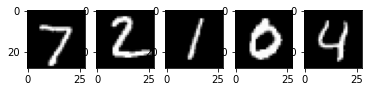

In [16]:
# show predicted images
fig, axes = plt.subplots(nrows = 1, ncols = 5)

for idx, ax in enumerate(axes):
    image = data_test[idx]
    ax.imshow(image, cmap = 'gray')
plt.show()

In [17]:
# confusion matrix
matrix = confusion_matrix(target_test.argmax(axis = 1), predict)
matrix

array([[ 975,    0,    0,    0,    0,    0,    2,    1,    2,    0],
       [   0, 1132,    0,    1,    0,    0,    1,    0,    1,    0],
       [   3,    8,  998,    4,    1,    0,    1,   11,    5,    1],
       [   0,    0,    2,  999,    0,    1,    0,    6,    2,    0],
       [   0,    0,    1,    0,  973,    0,    1,    0,    3,    4],
       [   2,    0,    0,    5,    0,  882,    2,    0,    1,    0],
       [   7,    2,    0,    0,    1,    3,  943,    0,    2,    0],
       [   0,    1,    4,    2,    0,    0,    0, 1020,    1,    0],
       [   5,    0,    2,    1,    1,    0,    0,    3,  961,    1],
       [   3,    7,    0,    2,    6,    3,    0,   11,    3,  974]],
      dtype=int64)

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

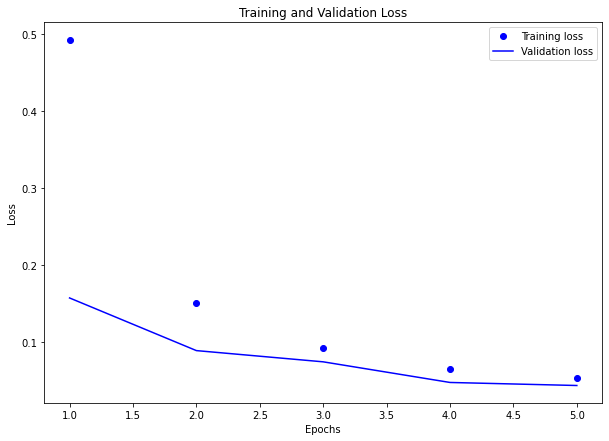

In [19]:
# plot training and validation loss
plt.figure(figsize=(10,7))

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

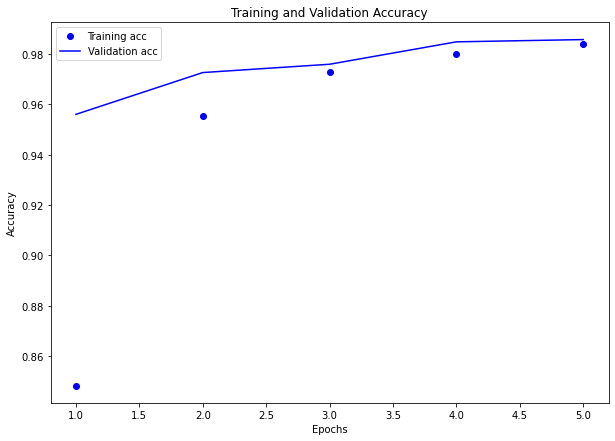

In [20]:
plt.clf()

plt.figure(figsize=(10,7))

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
# load and split data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
# show sizes
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('x_train shape: ', x_train.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
x_train shape:  (50000, 32, 32, 3)


In [23]:
cifar10_classes = ['airplane', 
                   'automobile', 
                   'bird', 
                   'cat', 
                   'deer', 
                   'dog', 
                   'frog', 
                   'horse', 
                   'ship', 
                   'truck']

In [24]:
# split data into train and validation

# scale the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
# view sizes
print('x-train scaled shape: ', x_train.shape)
print('x-test scaled shape: ', x_test.shape)

print('y_train ohe shape: ', y_train.shape)
print('y_test ohe shape: ', y_test.shape)

print('partial x_train shape: ', partial_x_train.shape)
print('partial y_train shape: ', partial_y_train.shape)

x-train scaled shape:  (50000, 32, 32, 3)
x-test scaled shape:  (10000, 32, 32, 3)
y_train ohe shape:  (50000, 10)
y_test ohe shape:  (10000, 10)
partial x_train shape:  (40000, 32, 32, 3)
partial y_train shape:  (40000, 10)


In [26]:
# build model
model = models.Sequential()

model.add(Conv2D(32, (3, 3), 
                        activation='relu', 
                        padding='same',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), 
                        activation='relu', 
                        padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), 
                        activation='relu', 
                        padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), 
                        activation='relu', 
                        padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [27]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 128)       

In [28]:
# compile model
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['acc'])

In [29]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=30, 
                    batch_size=64, 
                    validation_data = (x_val,y_val), 
                    validation_steps=50)

Epoch 1/30
625/625 [==============================] - 39s 62ms/step - loss: 0.2969 - acc: 0.2765 - val_loss: 0.2666 - val_acc: 0.3559
Epoch 2/30
625/625 [==============================] - 39s 62ms/step - loss: 0.2551 - acc: 0.3989 - val_loss: 0.2400 - val_acc: 0.4325
Epoch 3/30
625/625 [==============================] - 38s 61ms/step - loss: 0.2386 - acc: 0.4406 - val_loss: 0.2305 - val_acc: 0.4619
Epoch 4/30
625/625 [==============================] - 38s 60ms/step - loss: 0.2269 - acc: 0.4771 - val_loss: 0.2197 - val_acc: 0.4953
Epoch 5/30
625/625 [==============================] - 38s 61ms/step - loss: 0.2172 - acc: 0.5049 - val_loss: 0.2176 - val_acc: 0.5025
Epoch 6/30
625/625 [==============================] - 42s 67ms/step - loss: 0.2084 - acc: 0.5312 - val_loss: 0.2053 - val_acc: 0.5444
Epoch 7/30
625/625 [==============================] - 39s 63ms/step - loss: 0.2006 - acc: 0.5534 - val_loss: 0.1932 - val_acc: 0.5706
Epoch 8/30
625/625 [==============================] - 40s 64ms

In [30]:
# save model
model.save('cnn_classifier_1.h5')

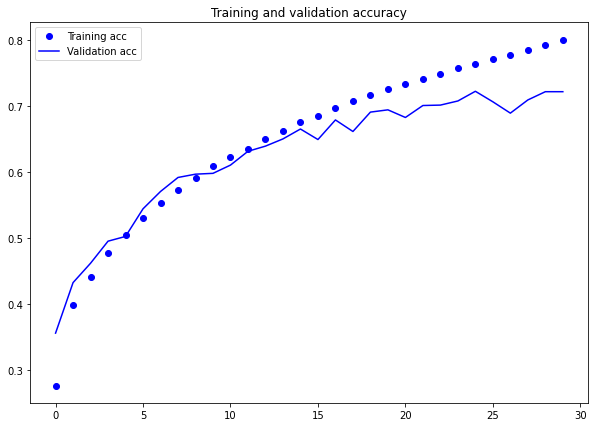

<Figure size 432x288 with 0 Axes>

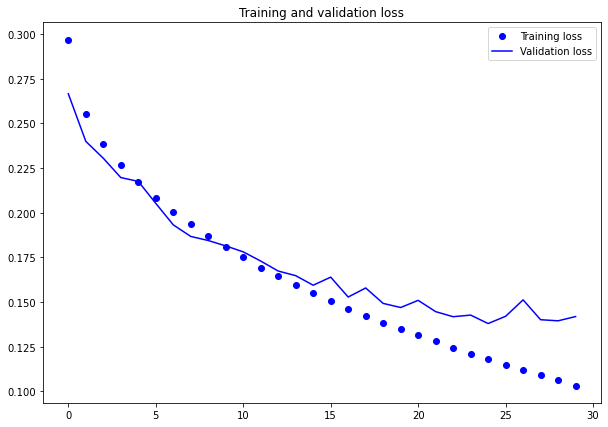

In [31]:
# plot training and validation accuracy
plt.figure(figsize=(10,7))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.1464 - acc: 0.7045


In [33]:
# make predictions
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

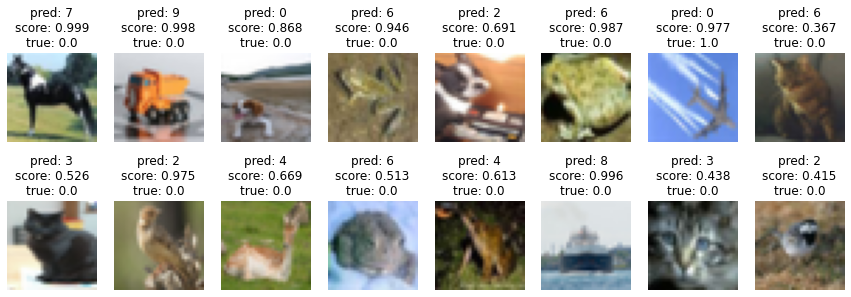

In [34]:
# show predictions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = y_pred_test_classes[random_index]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = y_test[random_index, 0]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

In [35]:
# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [36]:
# scale the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# transform target variable into one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [37]:
# build the model 
model = models.Sequential()
model.add(Conv2D(32, (3, 3), 
                        activation='relu',
                        padding='same',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), 
                        activation='relu',
                        padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), 
                        activation='relu',
                        padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), 
                        activation='relu',
                        padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics = ['acc'])

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(partial_x_train, partial_y_train, batch_size)

In [39]:
#  train the model using data augmentation and dropout:
history = model.fit(train_generator, 
                    steps_per_epoch=100, 
                    epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30
100/100 [==============================] - 7s 60ms/step - loss: 2.2985 - acc: 0.1191 - val_loss: 2.2834 - val_acc: 0.1507
Epoch 2/30
100/100 [==============================] - 6s 56ms/step - loss: 2.2591 - acc: 0.1484 - val_loss: 2.1915 - val_acc: 0.2339
Epoch 3/30
100/100 [==============================] - 6s 56ms/step - loss: 2.1358 - acc: 0.2019 - val_loss: 2.0563 - val_acc: 0.2506
Epoch 4/30
100/100 [==============================] - 6s 57ms/step - loss: 2.0601 - acc: 0.2262 - val_loss: 2.0441 - val_acc: 0.2490
Epoch 5/30
100/100 [==============================] - 6s 56ms/step - loss: 1.9920 - acc: 0.2650 - val_loss: 1.9223 - val_acc: 0.3049
Epoch 6/30
100/100 [==============================] - 6s 56ms/step - loss: 1.9489 - acc: 0.2837 - val_loss: 1.8340 - val_acc: 0.3415
Epoch 7/30
100/100 [==============================] - 6s 56ms/step - loss: 1.9033 - acc: 0.2891 - val_loss: 1.8829 - val_acc: 0.3152
Epoch 8/30
100/100 [==============================] - 6s 56ms/step - 

In [40]:
#  save the model
model.save('cnn_classifier_2.h5')

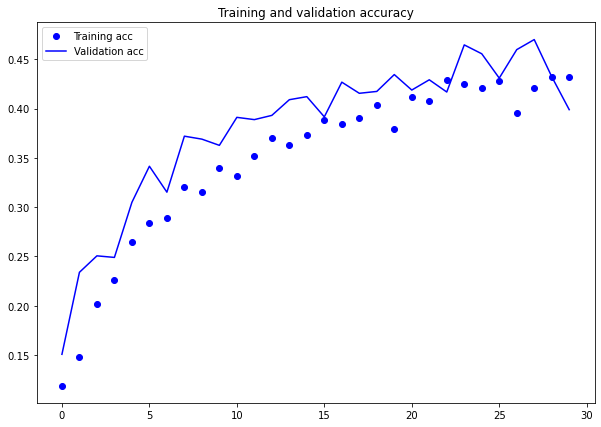

<Figure size 432x288 with 0 Axes>

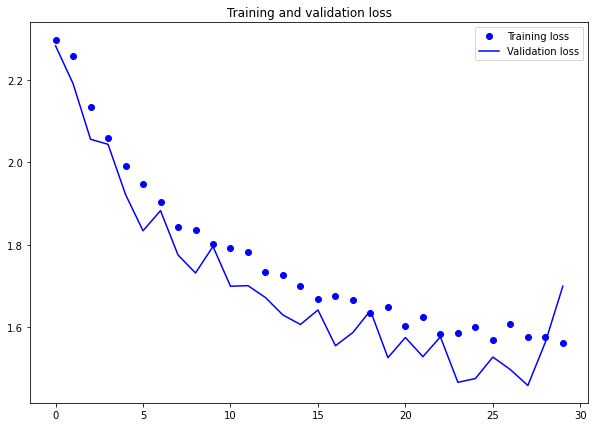

In [41]:
# plot the training vs validation - accuracy and loss

plt.figure(figsize=(10,7))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
# predicting test data
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

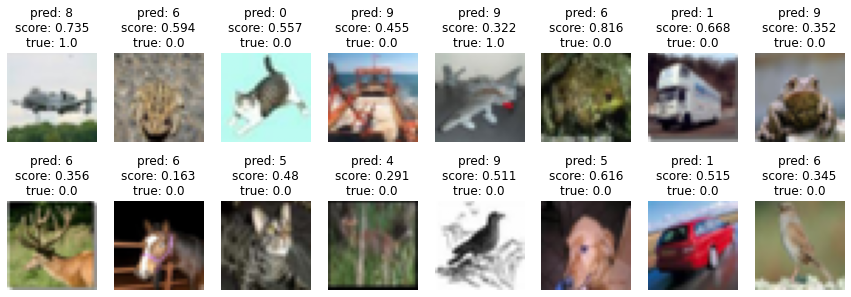

In [44]:
# display the predictions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = y_pred_test_classes[random_index]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = y_test[random_index, 0]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

In [45]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions